# Principal Components Analysis

In this notebook we'll explore the digits data with PCA.

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


Load the digits data and center or standardize it:

In [26]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
scaler = StandardScaler(with_std=False).fit(X)
X = scaler.transform(X)
X.shape

(1797, 64)

Let's apply PCA to the data and keep the first 10 principal components:

In [31]:
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

print (pca.explained_variance_ratio_)
X_reduced.shape

[ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782415  0.0491691
  0.04315987  0.03661373  0.03353248  0.03078806  0.0237234   0.02272696
  0.01821863  0.01773853  0.01467097  0.01409693  0.01318516  0.01248101
  0.01017188  0.00905374]


(1797, 20)

Now, let's visualize the first two principal components:

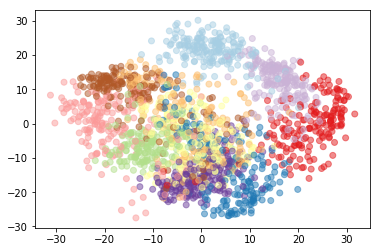

In [16]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5, c=y, cmap=plt.cm.Paired)


Let's take a look at the next two principal components:

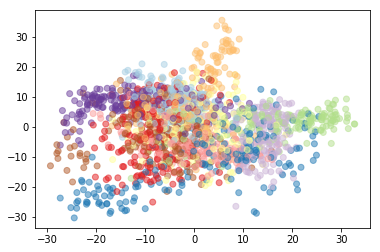

In [17]:
plt.scatter(X_reduced[:, 2], X_reduced[:, 3], alpha=0.5, c=y, cmap=plt.cm.Paired)


Let's go higher:

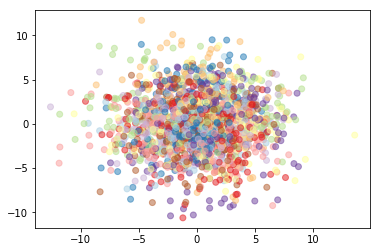

In [32]:
plt.scatter(X_reduced[:, 18], X_reduced[:, 19], alpha=0.5, c=y, cmap=plt.cm.Paired)


Let's compute baseline accuracy with all the features:

In [24]:
cv_generator = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
param_grid = {'C': np.logspace(-2, 1, 4)}
print(param_grid)
classifier = GridSearchCV(SVC(kernel='linear', C=1), param_grid, cv=cv_generator)
cv_results = cross_validate(classifier, X, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
np.mean(cv_results['test_score'])


{'C': array([  0.01,   0.1 ,   1.  ,  10.  ])}


0.97940399286312785

And now with the PCA-selected features:

In [30]:
cv_results = cross_validate(classifier, X_reduced, y, cv=cv_generator, scoring='accuracy', return_train_score=False)
np.mean(cv_results['test_score'])

0.96882886766564269